# Negative instances used can be found on:
https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset
# Positive instances  used can be found on:
https://github.com/ieee8023/covid-chestxray-dataset

# Positive images where further edited to folder name 'CoronaPositive' with metadata.csv and folder 'images' 
# Negative images where further edited to folder name 'CoronaNegative' with Chest_xray_Corona_Metadata.csv and folder 'images'


# data.npy was too big for commit and was commited as zip file, only needed to extract it as 'data.npy'



In [ ]:

import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy


In [4]:
input_shape = data.shape[1:] # (50,50,1)
model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, input_dim=128, activation='softmax'))
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2)
# analysis of the data
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X_train dtype: ',X_train.dtype)
print('first 5 X_train instances', X_train[0:5])
X_train.info()


X_train shape:  (1524, 100, 100, 1)
X_test shape:  (381, 100, 100, 1)
X_train dtype:  float64
first 5 X_train instances [[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.18039216]
   [0.28235294]
   [0.3254902 ]
   ...
   [0.        ]
   [0.        ]
   [0.01176471]]

  [[0.18823529]
   [0.2745098 ]
   [0.32941176]
   ...
   [0.        ]
   [0.        ]
   [0.00392157]]

  [[0.18823529]
   [0.26666667]
   [0.31764706]
   ...
   [0.        ]
   [0.        ]
   [0.01960784]]]


 [[[0.04313725]
   [0.07058824]
   [0.08235294]
   ...
   [0.43921569]
   [0.43921569]
   [0.4745098 ]]

  [[0.09803922]
   [0.11764706]
   [0.11372549]
   ...
   [0.46666667]
   [0.43529412]
   [0.49411765]]

  [[0.16470588]
   [0.17254902]

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [6]:
epochs = 20
batch_size=32

In [7]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1 )

Epoch 1/20
43/43 [==============================] - 14s 303ms/step - loss: 0.5957 - accuracy: 0.6944 - val_loss: 0.4802 - val_accuracy: 0.7190
Epoch 2/20
43/43 [==============================] - 14s 320ms/step - loss: 0.4442 - accuracy: 0.7768 - val_loss: 0.2725 - val_accuracy: 0.9150
Epoch 3/20
43/43 [==============================] - 13s 313ms/step - loss: 0.2905 - accuracy: 0.8964 - val_loss: 0.1553 - val_accuracy: 0.9542
Epoch 4/20
43/43 [==============================] - 13s 301ms/step - loss: 0.1961 - accuracy: 0.9329 - val_loss: 0.0952 - val_accuracy: 0.9739
Epoch 5/20
43/43 [==============================] - 13s 305ms/step - loss: 0.1504 - accuracy: 0.9497 - val_loss: 0.0660 - val_accuracy: 0.9804
Epoch 6/20
43/43 [==============================] - 13s 310ms/step - loss: 0.1259 - accuracy: 0.9606 - val_loss: 0.0513 - val_accuracy: 0.9804
Epoch 7/20
43/43 [==============================] - 13s 304ms/step - loss: 0.1000 - accuracy: 0.9708 - val_loss: 0.0378 - val_accuracy: 0.9869

In [8]:
from matplotlib import pyplot as plt


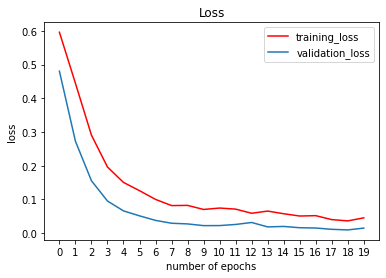

In [9]:
plt.title('Loss')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0,epochs))
plt.ylabel('loss')
plt.plot(np.arange(0, epochs), history.history['loss'],'r', label='training_loss')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='validation_loss')
plt.legend(loc='best')
plt.show()

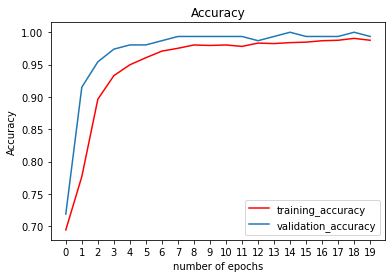

In [10]:
plt.title('Accuracy')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0, epochs))
plt.ylabel('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'],'r',label = 'training_accuracy')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'],label='validation_accuracy')
plt.legend(loc='best')
plt.show()

In [29]:
test_scores = model.evaluate(X_test, y_test)
print('Test loss: ', test_scores[0])
print('Test accuracy: ', test_scores[1])

12/12 [==============================] - 1s 72ms/step - loss: 0.0684 - accuracy: 0.9816
Test loss:  0.0684162825345993
Test accuracy:  0.9816272854804993


In [14]:
#adjusting the number of epochs to 12
epochs = 12
batch_size=32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1 )

Epoch 1/12
39/39 [==============================] - 12s 316ms/step - loss: 0.0188 - accuracy: 0.9967 - val_loss: 0.0189 - val_accuracy: 0.9967
Epoch 2/12
39/39 [==============================] - 13s 324ms/step - loss: 0.0218 - accuracy: 0.9902 - val_loss: 0.0167 - val_accuracy: 0.9967
Epoch 3/12
39/39 [==============================] - 14s 367ms/step - loss: 0.0227 - accuracy: 0.9943 - val_loss: 0.0202 - val_accuracy: 0.9934
Epoch 4/12
39/39 [==============================] - 14s 370ms/step - loss: 0.0236 - accuracy: 0.9934 - val_loss: 0.0187 - val_accuracy: 0.9934
Epoch 5/12
39/39 [==============================] - 17s 446ms/step - loss: 0.0139 - accuracy: 0.9967 - val_loss: 0.0175 - val_accuracy: 0.9967
Epoch 6/12
39/39 [==============================] - 16s 401ms/step - loss: 0.0197 - accuracy: 0.9918 - val_loss: 0.0190 - val_accuracy: 0.9934
Epoch 7/12
39/39 [==============================] - 15s 374ms/step - loss: 0.0178 - accuracy: 0.9934 - val_loss: 0.0267 - val_accuracy: 0.9902

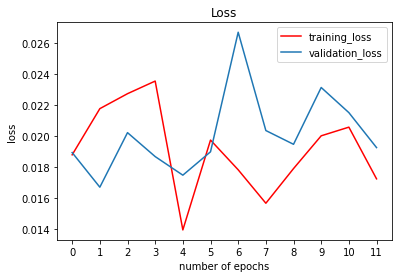

In [15]:
plt.title('Loss')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0,epochs))
plt.ylabel('loss')
plt.plot(np.arange(0, epochs), history.history['loss'],'r', label='training_loss')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='validation_loss')
plt.legend(loc='best')
plt.show()

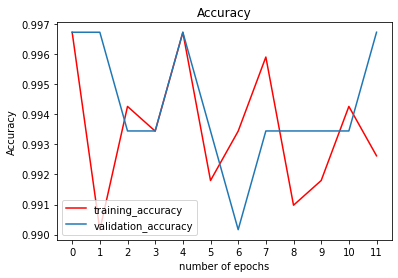

In [16]:
plt.title('Accuracy')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0, epochs))
plt.ylabel('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'],'r',label = 'training_accuracy')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'],label='validation_accuracy')
plt.legend(loc='best')
plt.show()

In [18]:
test_scores = model.evaluate(X_test, y_test)
print('Test loss: ', test_scores[0])
print('Test accuracy: ', test_scores[1])

12/12 [==============================] - 1s 76ms/step - loss: 0.7510 - accuracy: 0.2992
Test loss:  0.7510401606559753
Test accuracy:  0.29921260476112366


In [51]:
model_path = 'covid19_different_epochs_classifier.h5'
model.save(model_path)

In [39]:
#adjusting model with different dropout rates
input_shape = data.shape[1:] # (50,50,1)
model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, input_dim=128, activation='softmax'))
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 activation_7 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                  

In [19]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

Epoch 1/12
43/43 [==============================] - 13s 287ms/step - loss: 0.5753 - accuracy: 0.7068 - val_loss: 0.4341 - val_accuracy: 0.7582
Epoch 2/12
43/43 [==============================] - 12s 277ms/step - loss: 0.3707 - accuracy: 0.8570 - val_loss: 0.2064 - val_accuracy: 0.9608
Epoch 3/12
43/43 [==============================] - 13s 295ms/step - loss: 0.2180 - accuracy: 0.9278 - val_loss: 0.1226 - val_accuracy: 0.9542
Epoch 4/12
43/43 [==============================] - 13s 299ms/step - loss: 0.1752 - accuracy: 0.9497 - val_loss: 0.0839 - val_accuracy: 0.9673
Epoch 5/12
43/43 [==============================] - 13s 295ms/step - loss: 0.1283 - accuracy: 0.9599 - val_loss: 0.0709 - val_accuracy: 0.9739
Epoch 6/12
43/43 [==============================] - 12s 283ms/step - loss: 0.1121 - accuracy: 0.9643 - val_loss: 0.0570 - val_accuracy: 0.9804
Epoch 7/12
43/43 [==============================] - 12s 281ms/step - loss: 0.0909 - accuracy: 0.9708 - val_loss: 0.0368 - val_accuracy: 0.9935

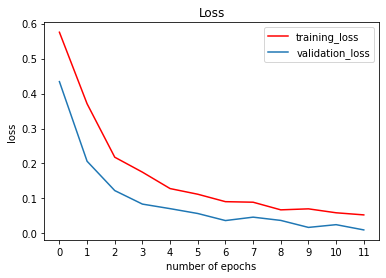

In [20]:
plt.title('Loss')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0,epochs))
plt.ylabel('loss')
plt.plot(np.arange(0, epochs), history.history['loss'],'r', label='training_loss')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='validation_loss')
plt.legend(loc='best')
plt.show()

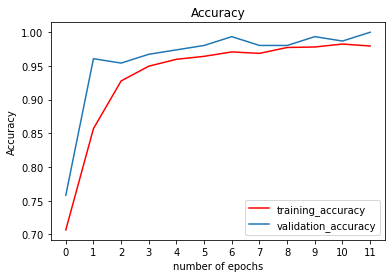

In [21]:
plt.title('Accuracy')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0, epochs))
plt.ylabel('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'],'r',label = 'training_accuracy')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'],label='validation_accuracy')
plt.legend(loc='best')
plt.show()

In [22]:
test_scores = model.evaluate(X_test, y_test)
print('Test loss: ', test_scores[0])
print('Test accuracy: ', test_scores[1])

12/12 [==============================] - 1s 71ms/step - loss: 0.0662 - accuracy: 0.9790
Test loss:  0.06619599461555481
Test accuracy:  0.9790025949478149


In [50]:
model_path = 'covid19_different_dropout_classifier.h5'
model.save(model_path)

In [23]:
#adjusting network with 20 epochs and same dropout rate as in last model

In [40]:
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

Epoch 1/20
43/43 [==============================] - 13s 283ms/step - loss: 0.5039 - accuracy: 0.7505 - val_loss: 0.2638 - val_accuracy: 0.9412
Epoch 2/20
43/43 [==============================] - 14s 321ms/step - loss: 0.2308 - accuracy: 0.9300 - val_loss: 0.1247 - val_accuracy: 0.9739
Epoch 3/20
43/43 [==============================] - 14s 334ms/step - loss: 0.1344 - accuracy: 0.9555 - val_loss: 0.0762 - val_accuracy: 0.9608
Epoch 4/20
43/43 [==============================] - 14s 331ms/step - loss: 0.1037 - accuracy: 0.9657 - val_loss: 0.0635 - val_accuracy: 0.9804
Epoch 5/20
43/43 [==============================] - 14s 332ms/step - loss: 0.0799 - accuracy: 0.9737 - val_loss: 0.0479 - val_accuracy: 0.9804
Epoch 6/20
43/43 [==============================] - 14s 331ms/step - loss: 0.0750 - accuracy: 0.9759 - val_loss: 0.0542 - val_accuracy: 0.9739
Epoch 7/20
43/43 [==============================] - 14s 335ms/step - loss: 0.0661 - accuracy: 0.9774 - val_loss: 0.0424 - val_accuracy: 0.9804

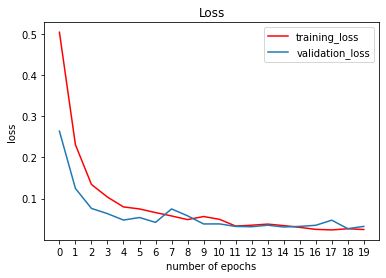

In [41]:
plt.title('Loss')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0,epochs))
plt.ylabel('loss')
plt.plot(np.arange(0, epochs), history.history['loss'],'r', label='training_loss')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='validation_loss')
plt.legend(loc='best')
plt.show()

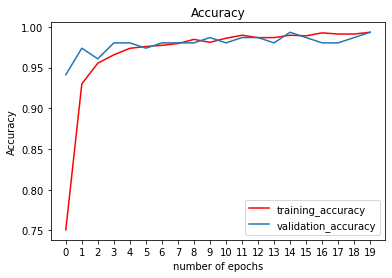

In [42]:
plt.title('Accuracy')
plt.xlabel('number of epochs')
plt.xticks(np.arange(0, epochs))
plt.ylabel('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'],'r',label = 'training_accuracy')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'],label='validation_accuracy')
plt.legend(loc='best')
plt.show()

In [43]:
test_scores = model.evaluate(X_test, y_test)
print('Test loss: ', test_scores[0])
print('Test accuracy: ', test_scores[1])

12/12 [==============================] - 1s 85ms/step - loss: 0.0238 - accuracy: 0.9895
Test loss:  0.023795468732714653
Test accuracy:  0.9895012974739075


# This is the best model with best hyperparameters
# this will be used as our best model

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model_path = 'covid19_best_classifier.h5'

In [47]:
model.save(model_path)

In [48]:
reloaded_model = load_model(model_path)

In [49]:
reloaded_model.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 100, 100, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_4'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_6',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Activation',
   'config': {'name': 'activation_6',
    'trainable': True,
    'dtype': 'float32',
    'activation': 'relu'}},